# Example usage

Here we will demonstrate how to use `lrasm` in a project to check linear regression assumptions:

In [7]:
from lrasm.homoscedasticity_tst import homoscedasticity_test
from lrasm.multicollinearity_tst import multicollinearity_test
from lrasm.normality_tst import normality_test
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

print(lrasm.__version__)

0.1.0


### Define Sample Data

We will use the `Iris` dataset from `scikit-learn` to demonstrate the functionality of `lrasm`. 

In [12]:
data = datasets.load_iris()
iris_df = pd.DataFrame(data=data.data, columns=data.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In our example, we want to investigate the linear relationship between the response `petal width (cm)` versus the predictors: `sepal length (cm)`, `sepal width (cm)`, and `petal width (cm)`. We start by splitting the dataset into a dataframe containing the predictors and a series containing the response:

In [15]:
X = iris_df.drop("sepal width (cm)", axis = 1)
X

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [17]:
y = iris_df["petal width (cm)"]
y

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width (cm), Length: 150, dtype: float64

### Test for Homoscedasticity of Residuals

We can evaluate the homoscedasticity of our residuals by passing our predictors and response into the function `homoscedasticity_test()`. Note that `homoscedasticity_test()` returns two objects, the first one is a dataframe containing the correlation coefficient of absolute residuals vs predicted values along with the P value of said correlation, while the second is a plot of residuals vs predicted values.

The correlation coefficient between the absolute residuals and the fitted y values is:  0.734  With a p value of:  0.0
The p value of the correlation is below the rejection threshold, thus the correlation is likely significant.         
The data is unlikely to be homoscedastic.


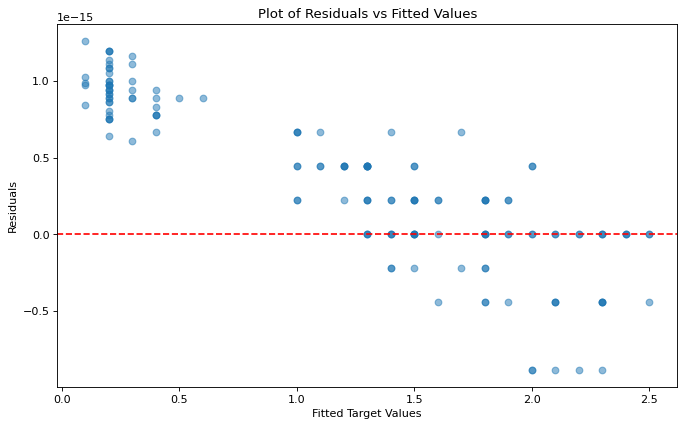

In [21]:
corr_df, plot = homoscedasticity_test(X, y)

In [22]:
corr_df

,correlation_coefficient,p_value
0,0.734,0.0


In the example above, it's clear that the residuals are not independent of the fitted values, thus we would conclude that the linear relationship is not homosecdastic.